# Matplotlib Homework - The Power of Plots

### Observations
1. From the bar chart we notice that Capomulin was the main drug used on mice with a count of 230 treatments. Propriva had the lowest amount of treatments with 182.

2. From our calculations we see that the correlation between mouse weight and avg tumor volume is 0.84

3. From the sampled treatments we can determine that Capomulin and Ramicane are the best drug regimens to reduce the size of a mouse's tumor.

### Imports and CSV read

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets

#Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

#Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


### Cleaning Data

In [2]:
#Checking the number of mice.
distinct_mice_count = combined_data["Mouse ID"].nunique() 
print("Mice Count =", distinct_mice_count)

Mice Count = 249


In [3]:
#identify incomplete rows
#print(combined_data.count())

#mice_ID_count = combined_data["Mouse ID"].value_counts()
#mice_ID_count

#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

duplicate_mouse_id = pd.DataFrame(duplicate_mice)
duplicate_mouse_id

,0
0,g989


In [4]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data["Mouse ID"].isin(duplicate_mice)==False]

In [5]:
#Checking the number of mice in the clean DataFrame.
clean_df_count = clean_df["Mouse ID"].nunique()

clean_df_count

248

## Summary Statistics

In [6]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#mean, median, variance, standard deviation, and SEM of the tumor volume.
grouped_tumor_vol_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
grouped_tumor_vol_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
grouped_tumor_vol_var = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
grouped_tumor_vol_std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
grouped_tumor_vol_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]



In [7]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = pd.DataFrame({"Mean" : grouped_tumor_vol_mean, 
                           "Median" : grouped_tumor_vol_median, 
                           "Variance" : grouped_tumor_vol_var, 
                           "Standard Variance" : grouped_tumor_vol_std,
                           "SEM" : grouped_tumor_vol_sem
                          })
summary_df

#Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = clean_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
agg_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [8]:
#Creating new series to gather counts of measurements grouped by drug regimen
num_of_measurements = clean_df.groupby("Drug Regimen").count()["Mouse ID"]
num_of_measurements 

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

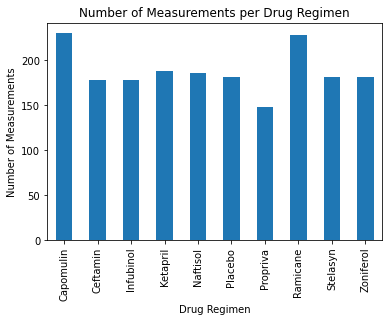

<Figure size 432x288 with 0 Axes>

In [9]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_of_m_chart = num_of_measurements.plot(kind="bar", title="Number of Measurements per Drug Regimen")
num_of_m_chart.set_xlabel("Drug Regimen")
num_of_m_chart.set_ylabel("Number of Measurements")

plt.show()
plt.tight_layout()
plt.savefig("../Images/pandas_bar.png")

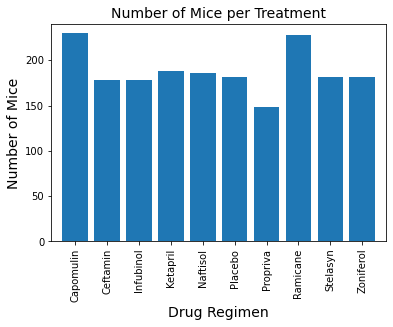

In [10]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(num_of_measurements))
fig, ax = plt.subplots()
plt.bar(x_axis, num_of_measurements, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation=90)

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(num_of_measurements)+10)

plt.title("Number of Mice per Treatment",fontsize = 14)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)

plt.savefig("../Images/pyplot_bar.png")

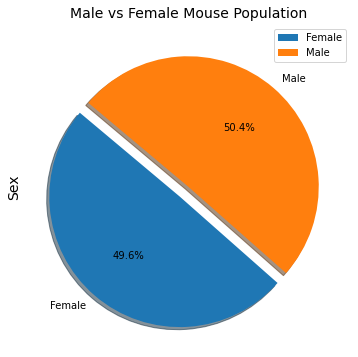

In [11]:
#Generate a pie plot showing the distribution of female versus male mice using pandas

#Group by gender and get the number to plot
groupby_gender = clean_df.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#Create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#Format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#gender_df
mouse_gender

explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(10,6), startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 14)
plt.ylabel('Sex',fontsize = 14)

plt.savefig("../Images/pie_pandas.png")
plt.show()

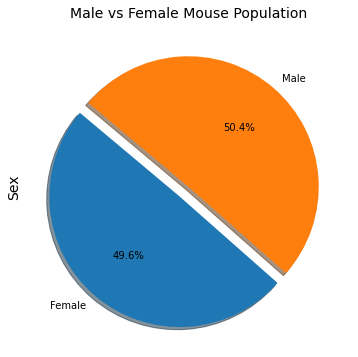

In [12]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot
#Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.6,50.4]

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
fig2, ax2 = plt.subplots(figsize=(10,6))
plt.pie(sizes, explode=explode,labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Male vs Female Mouse Population',fontsize = 14)
plt.ylabel('Sex',fontsize = 14)

plt.savefig("../Images/py_plot.png")
plt.show()


## Quartiles & Outliers

In [13]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

#Start by getting the last (greatest) timepoint for each mouse
#Merge this group df with the original dataframe to get the tumor volume at the last timepoint

### Capomulin Calculations

In [14]:
#Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [15]:
#Capomulin quartiles and IQR
#Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


### Ramicane Calculations

In [16]:
#Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [17]:
#Ramicane quartiles and IQR
#Determine outliers using upper and lower bounds
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


### Infubinol Calculations

In [18]:
#Infubinol 
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [19]:
#Infubinol quartiles and IQR
#Determine outliers using upper and lower bounds
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


### Ceftamin Calculations

In [20]:
#Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [21]:
#Ceftamin quartiles and IQR
#Determine outliers using upper and lower bounds
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

#Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The the median of temperatures is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


 ## Boxplot

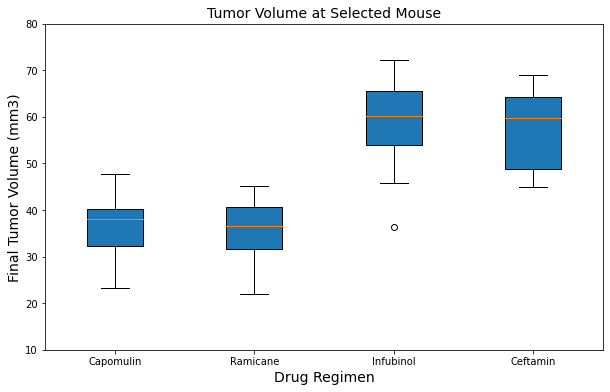

In [22]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig3, ax3 = plt.subplots(figsize=(10,6))
ax3.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)
ax3.set_title('Tumor Volume at Selected Mouse', fontsize = 14)
ax3.set_ylabel('Final Tumor Volume (mm3)',fontsize =14)
ax3.set_xlabel('Drug Regimen',fontsize =14)

plt.ylim(10, 80)

plt.savefig("../Images/box_plot.png")

plt.show()

## Line and Scatter Plots

In [23]:
#Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "g316",:]
forline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1


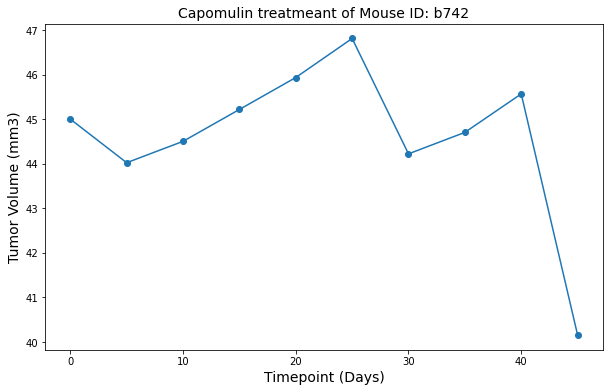

In [24]:
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(10,6))
plt.title('Capomulin treatmeant of Mouse ID: b742',fontsize =14)
plt.plot(x_axis, tumsiz, marker="o")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)


plt.savefig("../Images/line_graph.png")
plt.show()

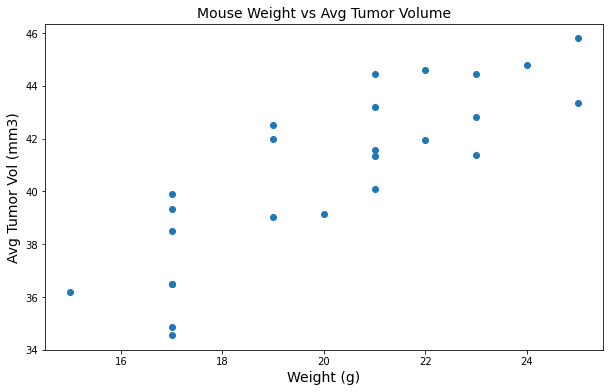

In [25]:
#Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(10, 6))
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs Avg Tumor Volume',fontsize =14)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Avg Tumor Vol (mm3)',fontsize =14)


plt.savefig("../Images/scatterplot.png")
plt.show()

## Correlation and Regression

In [26]:
#Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [27]:
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241047
intercept:21.55216053268501
rvalue (Correlation coefficient):0.841936342469472
pandas (Correlation coefficient):0.84
stderr:0.1275435903320133
y = 0.95x + 21.55


The r-squared is: 0.7088568047708721


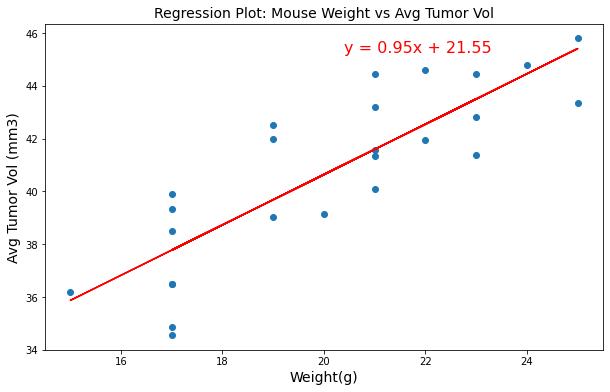

In [28]:
#Add the linear regression equation and line to plot
fig4, ax4 = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot: Mouse Weight vs Avg Tumor Vol',fontsize =14)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Avg Tumor Vol (mm3)',fontsize =14)
ax4.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=16,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("../Images/linear_regression.png")
plt.show()